## **1. Loading the Data and the Required Packages**

In [1]:
# Loading required packages
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

Using TensorFlow backend.


In [2]:
# Load the data
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

## **2. Data Inspection and EDA **

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape

(42000, 785)

Our training data consists of 42,000 rows and 785 columns. Each row represents individual images. The first column is the "label" for the digit in the image, while the rest of the columns correspond to the pixels associated with the images.   

### 2.1 Checking for Missing Values

In [5]:
train_data.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [6]:
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

There are no missing values based on the initial data inspection. 

### 2.2 Examine the Distribution of the Labels

In [7]:
train_data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Text(0.5, 1.0, 'Number of digit classes')

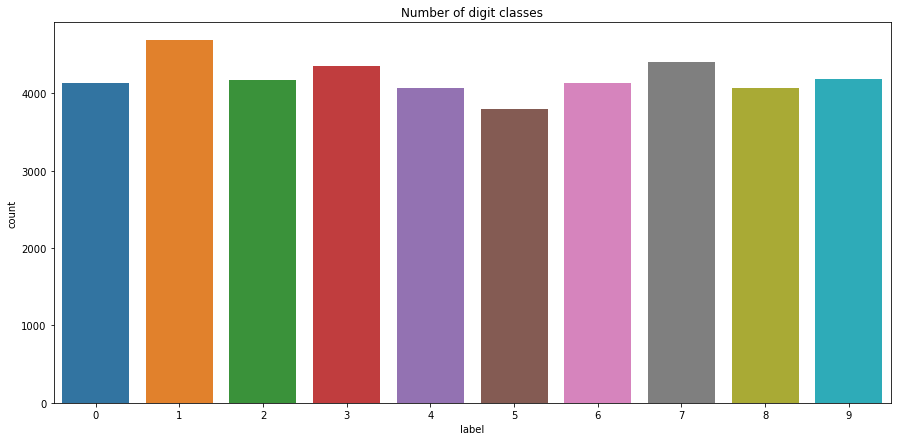

In [8]:
plt.figure(figsize=(15,7))
sns.countplot(train_data['label'])
plt.title("Number of digit classes")

From the plot it appears that the 10 digits have fairly similar counts and it relatively balanced. We can therefore prepare the data for modelling.

## 3. Preparing the Data for Prediction

### 3.1 Separating the Predictors from the Labels

In [9]:
X = train_data.drop('label' , axis=1)
y = train_data['label']

### 3.2 Normalizing the Data to Increase Model Efficency

In this step we perform grayscale normalization on the features by dividing everything by 255. <br>This would help make the model run faster. 

In [10]:
X = X / 255.0

### 3.3 Partitioning the Data into Train and Test Split

We split the data into test and training set to be able to get a sense of its performance in unseen data.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)

### 3.4 Reshaping the data for CNN

This transformation is necessary to make the data shape suitable for the CNN prediction in Keras.

In [12]:
X_train = X_train.values.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.values.reshape(-1, 28, 28, 1).astype('float32') 

In [13]:
print(X_train.shape)
print(X_test.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)


### 3.5 One-Hot Encoding of the Target Variable 

The outcome (digit labels) is categorical format hence the need to transform them into one-hot vectors containing 1 or 0. 

In [14]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [15]:
print(y_train.shape)
print(y_test.shape)

(37800, 10)
(4200, 10)


## 4. Prediction Through Convolutional Neural Networks (CNN)

In [16]:
# Setting up the neural network model

NUM_CLASSES = 10
IMG_ROWS = 28
IMG_COLS = 28

model = Sequential()

model.add(Conv2D(32,(3,3),activation= 'relu',input_shape=(IMG_ROWS,IMG_COLS,1)))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3),activation= 'relu'))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3),activation= 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation= 'relu'))
model.add(Dense(256,activation= 'relu'))
model.add(Dense(256,activation= 'relu'))
model.add(Dense(NUM_CLASSES,activation= 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            

In [17]:
# Compiling and fitting the model

model.compile(optimizer = 'adam', 
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, validation_split=0.2, epochs=10)

Train on 30240 samples, validate on 7560 samples
Epoch 1/10
30240/30240 [==============================] - 82s 3ms/step - loss: 0.2598 - accuracy: 0.9183 - val_loss: 0.0885 - val_accuracy: 0.9716
Epoch 2/10
30240/30240 [==============================] - 80s 3ms/step - loss: 0.0970 - accuracy: 0.9706 - val_loss: 0.0679 - val_accuracy: 0.9788
Epoch 3/10
30240/30240 [==============================] - 80s 3ms/step - loss: 0.0704 - accuracy: 0.9775 - val_loss: 0.0632 - val_accuracy: 0.9836
Epoch 4/10
30240/30240 [==============================] - 80s 3ms/step - loss: 0.0634 - accuracy: 0.9808 - val_loss: 0.0568 - val_accuracy: 0.9837
Epoch 5/10
30240/30240 [==============================] - 80s 3ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0532 - val_accuracy: 0.9854
Epoch 6/10
 6720/30240 [=====>........................] - ETA: 1:00 - loss: 0.0463 - accuracy: 0.9866

In [18]:
# Evaluating the model for out of sample performance

model.evaluate(X_test, y_test, batch_size=32)

4200/4200 [==============================] - 2s 505us/step


[0.04331282474570409, 0.9892857074737549]

## 5. Predicting the Test Data for Submission

In [19]:
# Reshaping the data for CNN

test_data_OH = test_data.values.reshape(-1, 28, 28, 1).astype('float32')
print(test_data_OH.shape)

(28000, 28, 28, 1)


In [20]:
# Prediction Dataset

predictions = model.predict(test_data_OH, batch_size = 32)
predictions = np.array([np.argmax(row) for row in predictions])
submission = pd.DataFrame({'ImageId' : np.arange(1,len(test_data)+1), 'Label' : predictions})

In [21]:
# Export to csv

submission.to_csv("cnn_mnist_predictions_12May2020.csv",index=False)

to be continued

to add:

Validation plots to assess overfitting  <br>
Examination of the wrongly-classified images  <br>